In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.tree import export_graphviz
from IPython.display import Image 
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
bos["Target"] = boston.target

In [5]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [8]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Target     float64
dtype: object

In [9]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

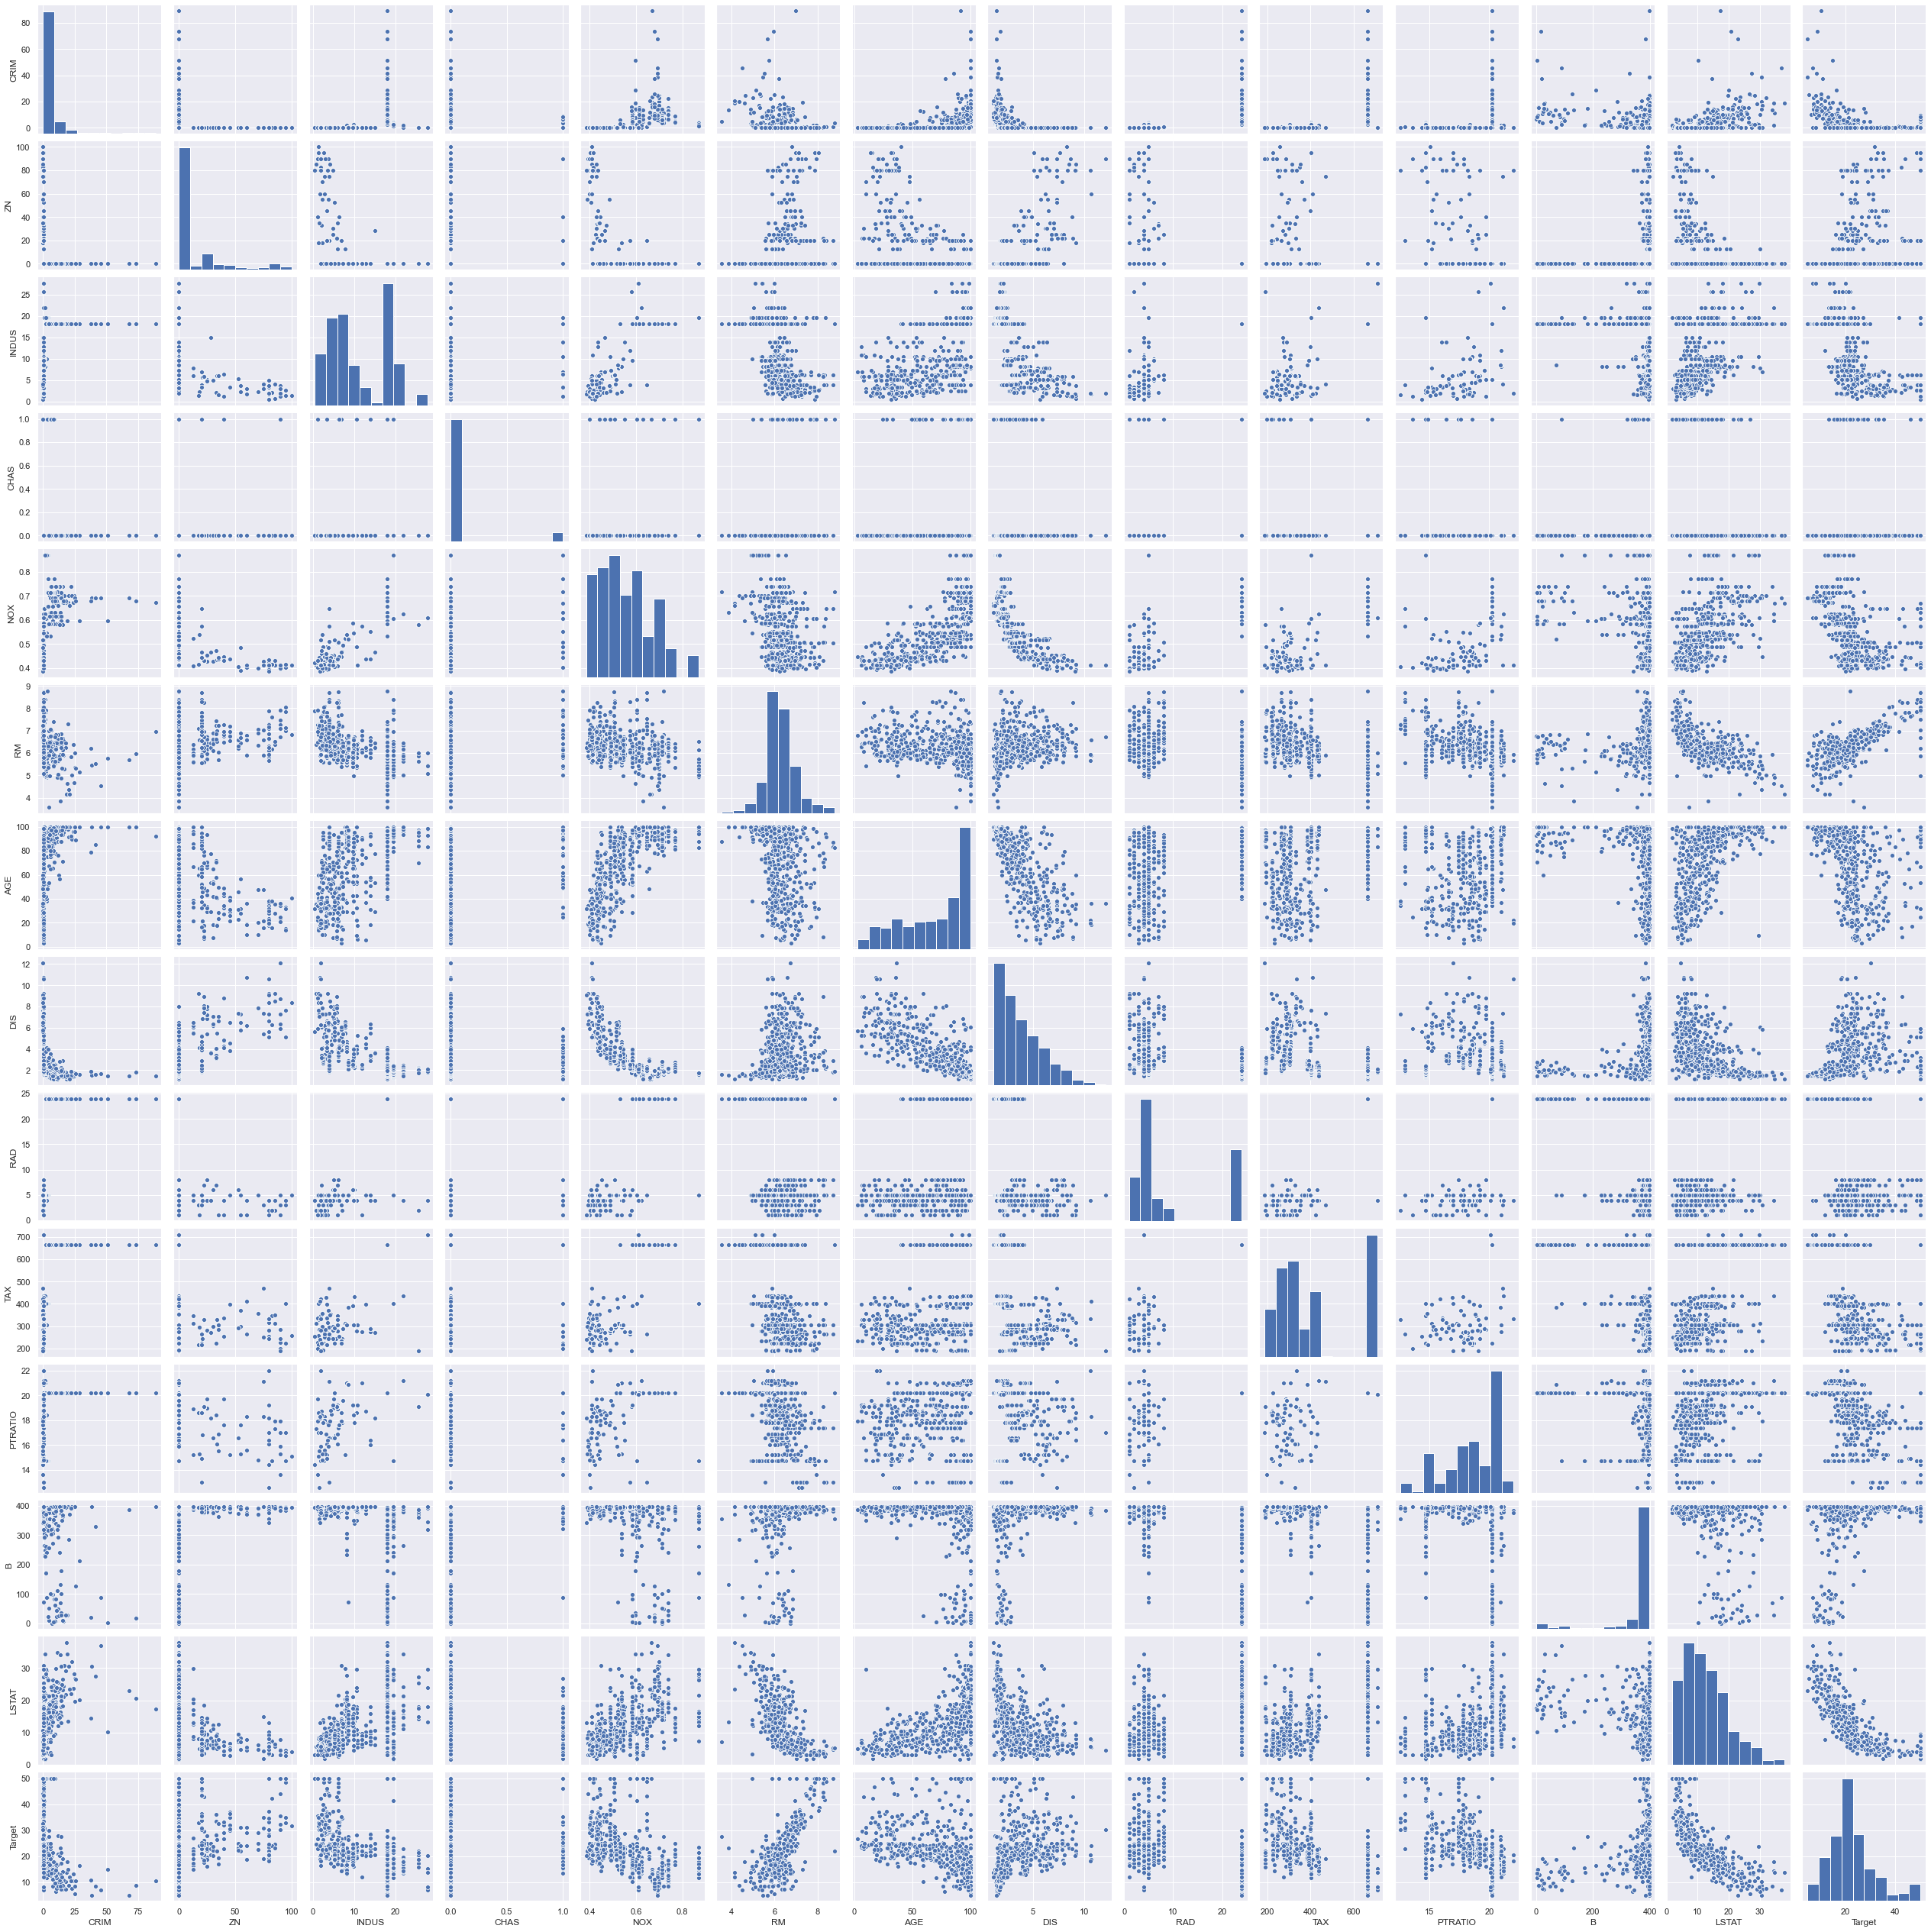

In [10]:
sns.pairplot(bos)

In [11]:
'''plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()'''

"plt.figure(figsize=(20,25), facecolor='white')\nplotnumber = 1\n\nfor column in bos:\n    if plotnumber<=16 :\n        ax = plt.subplot(4,4,plotnumber)\n        sns.distplot(bos[column])\n        plt.xlabel(column,fontsize=20)\n    plotnumber+=1\nplt.tight_layout()"

In [12]:
#my_report = sv.analyze(bos, target_feat="Target")

In [13]:
#my_report.show_html()

In [14]:
corrmat = bos.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

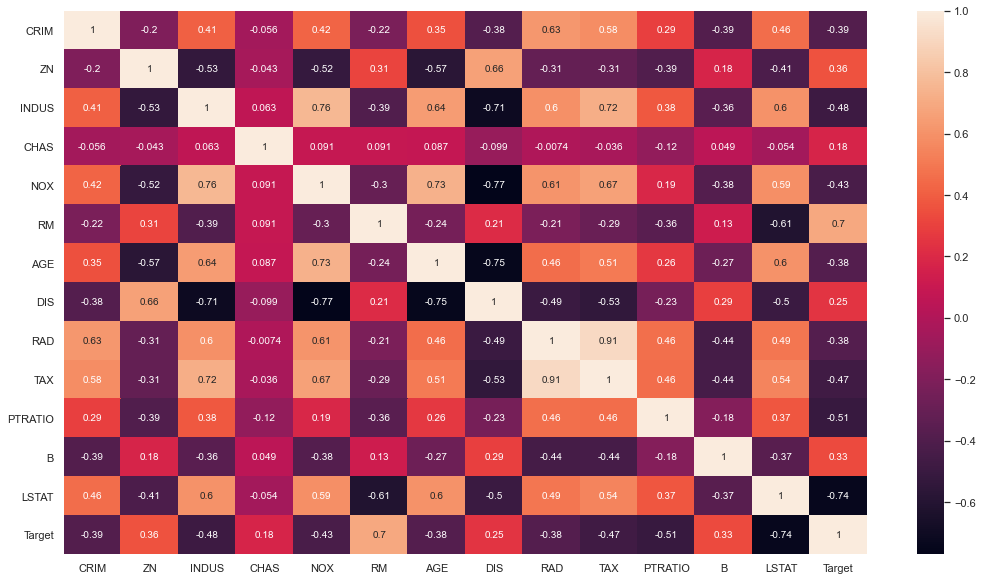

In [15]:
fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrmat, annot=True, annot_kws={"size":10})

In [16]:
X=bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
Y=bos['Target']

In [17]:
X= sm.add_constant(X)
ols = sm.OLS(Y,X).fit()

In [18]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 20 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        21:25:20   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
y = bos['Target']
x =bos.drop(columns = ['Target'])

<AxesSubplot:>

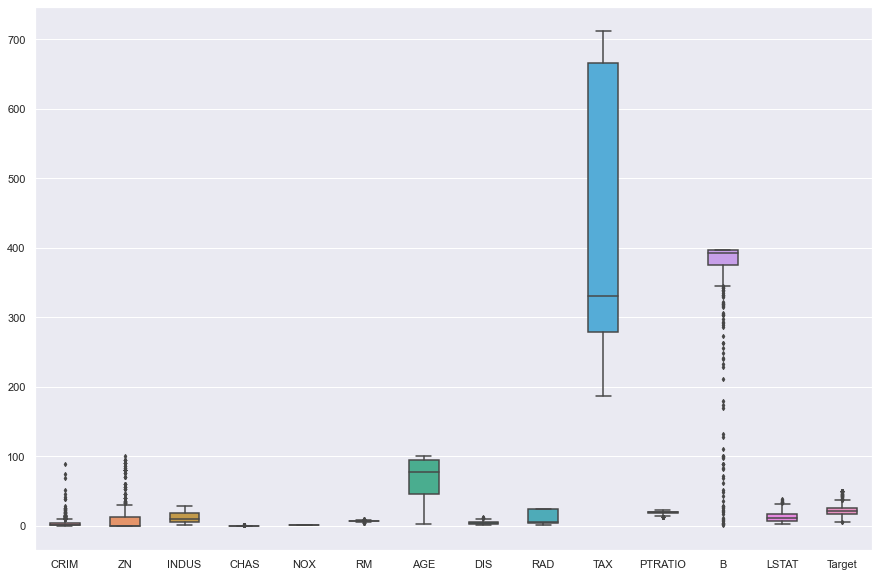

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos, width= 0.5,ax=ax,  fliersize=3)

In [21]:
data=bos.copy()

Text(0, 0.5, 'Target')

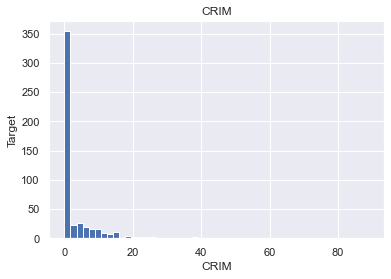

In [22]:
figure= bos.CRIM.hist(bins=50)
figure.set_title("CRIM")
figure.set_xlabel("CRIM")
figure.set_ylabel("Target")

<AxesSubplot:>

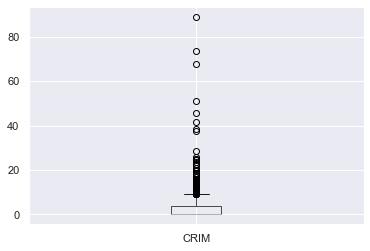

In [23]:
bos.boxplot(column ="CRIM")

In [24]:
IQR_CRIM = data.CRIM.quantile(0.75)-bos.CRIM.quantile(0.25)
IQR_CRIM

3.5950375

In [25]:
data.CRIM.quantile(0.75)

3.6770825

In [26]:
lower_bound=data["CRIM"].quantile(0.25)-(IQR_CRIM*3)
higher_bound=data["CRIM"].quantile(0.75)+(IQR_CRIM*3)
print(lower_bound), print(higher_bound)

-10.7030675
14.462195000000001


(None, None)

In [27]:
data.loc[data["CRIM"]>=14, "CRIM"]=14

Text(0, 0.5, 'Target')

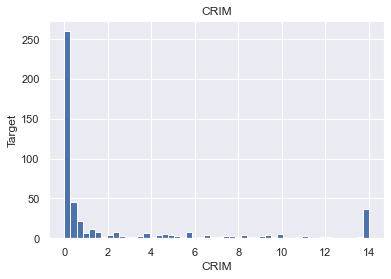

In [28]:
figure= data.CRIM.hist(bins=50)
figure.set_title("CRIM")
figure.set_xlabel("CRIM")
figure.set_ylabel("Target")

<AxesSubplot:>

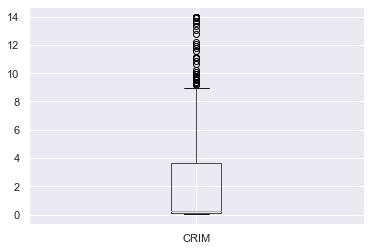

In [29]:
data.boxplot(column ="CRIM")

Text(0, 0.5, 'Target')

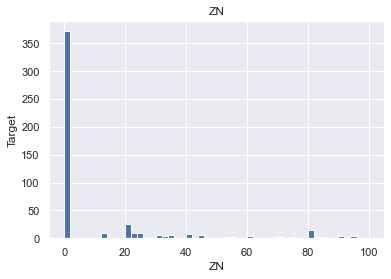

In [30]:
figure= bos.ZN.hist(bins=50)
figure.set_title("ZN")
figure.set_xlabel("ZN")
figure.set_ylabel("Target")

<AxesSubplot:>

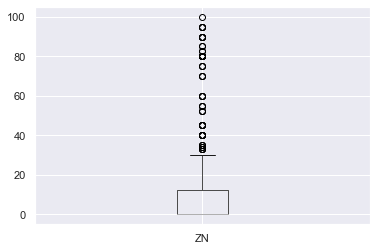

In [31]:
bos.boxplot(column ="ZN")

In [32]:
IQR_ZN = data.ZN.quantile(0.75)-data.ZN.quantile(0.25)
IQR_ZN

12.5

In [33]:
lower_ZN=data["ZN"].quantile(0.25)-(IQR_ZN*1.5)
higher_ZN=data["ZN"].quantile(0.75)+(IQR_ZN*1.5)
print(lower_ZN), print(higher_ZN)

-18.75
31.25


(None, None)

In [34]:
data.loc[data["ZN"]>=31, "ZN"]=31

Text(17.246875000000003, 0.5, 'Target')

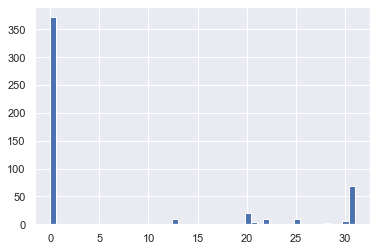

In [35]:
figure_zn= data.ZN.hist(bins=50)
figure.set_title("ZN")
figure.set_xlabel("ZN")
figure.set_ylabel("Target")

<AxesSubplot:>

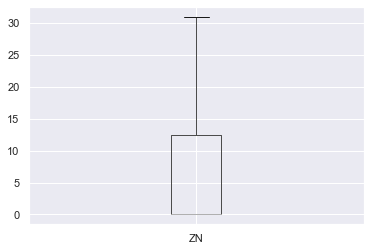

In [36]:
data.boxplot(column ="ZN")

Text(0, 0.5, 'Target')

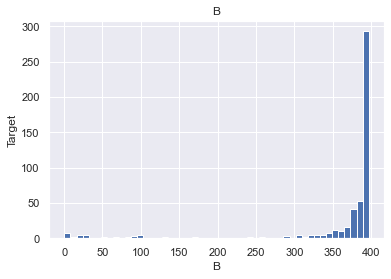

In [37]:
figure= bos.B.hist(bins=50)
figure.set_title("B")
figure.set_xlabel("B")
figure.set_ylabel("Target")

<AxesSubplot:>

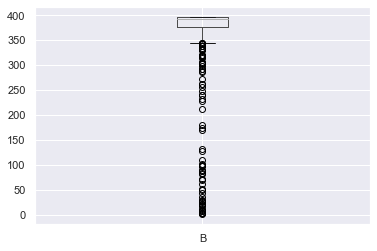

In [38]:
bos.boxplot(column ="B")

In [39]:
IQR_B = data.B.quantile(0.75)-data.B.quantile(0.25)
IQR_B

20.847500000000025

In [40]:
lower_B=data["B"].quantile(0.25)-(IQR_B*3.0)
higher_B=data["B"].quantile(0.75)+(IQR_B*3.0)
print(lower_B), print(higher_B)

312.8349999999999
458.7675000000001


(None, None)

In [41]:
data.loc[data["B"]<=312, "B"]=312

<AxesSubplot:>

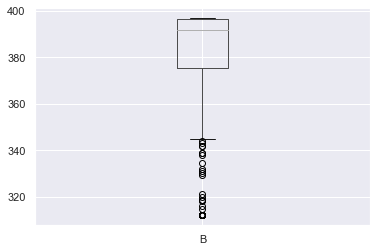

In [42]:
data.boxplot(column ="B")

Text(0, 0.5, 'Target')

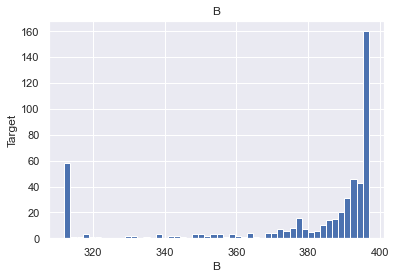

In [43]:
figure= data.B.hist(bins=50)
figure.set_title("B")
figure.set_xlabel("B")
figure.set_ylabel("Target")

In [44]:
bos["LSTAT"].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

<AxesSubplot:>

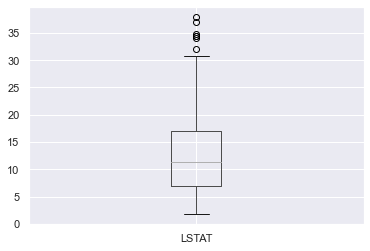

In [45]:
bos.boxplot(column ="LSTAT")

In [46]:
upper_limit=data["LSTAT"].mean()+3*data["LSTAT"].std()
lower_limit=data["LSTAT"].mean()-3*data["LSTAT"].std()
print(lower_limit),print(upper_limit) 

-8.77012129293899
34.07624777515244


(None, None)

In [47]:
IQR_L = data.LSTAT.quantile(0.75)-bos.LSTAT.quantile(0.25)
IQR_L

10.005000000000003

In [48]:
lower_l=data["LSTAT"].quantile(0.25)-(IQR_L*1.5)
higher_l=data["LSTAT"].quantile(0.75)+(IQR_L*1.5)
print(lower_l), print(higher_l)

-8.057500000000005
31.962500000000006


(None, None)

In [49]:
data.loc[data["LSTAT"]>=31, "LSTAT"]=31

<AxesSubplot:>

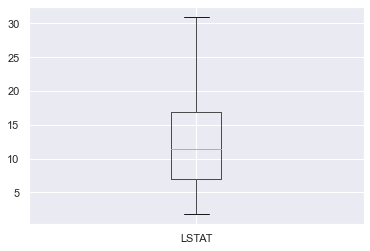

In [50]:
data.boxplot(column ="LSTAT")

<AxesSubplot:>

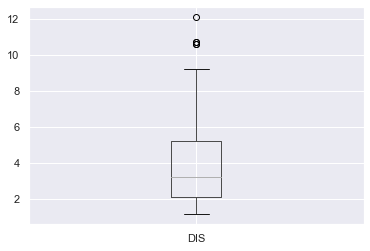

In [51]:
bos.boxplot(column ="DIS")

In [52]:
upper_limit_dis=data["DIS"].mean()+3*data["DIS"].std()
lower_limit_dis=data["DIS"].mean()-3*data["DIS"].std()
print(lower_limit_dis),print(upper_limit_dis)

-2.5220876921357975
10.112173067629865


(None, None)

In [53]:
IQR_dis= data.DIS.quantile(0.75)-bos.DIS.quantile(0.25)
IQR_dis

3.0882500000000004

In [54]:
data.loc[data["DIS"]>=10, "DIS"]=10

<AxesSubplot:>

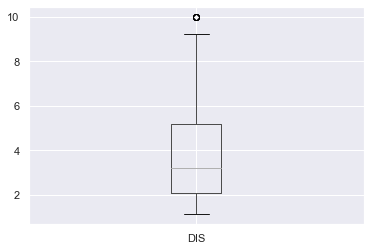

In [55]:
data.boxplot(column ="DIS")

<AxesSubplot:>

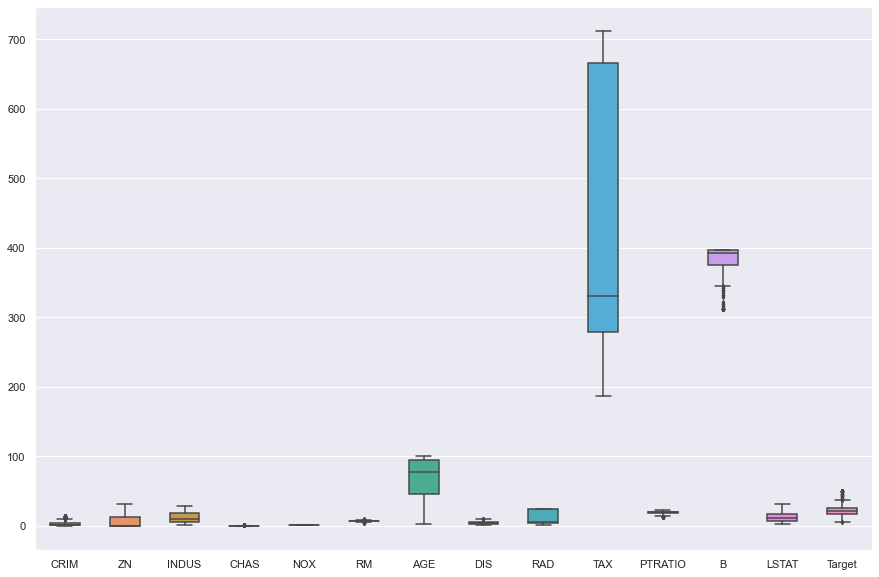

In [56]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

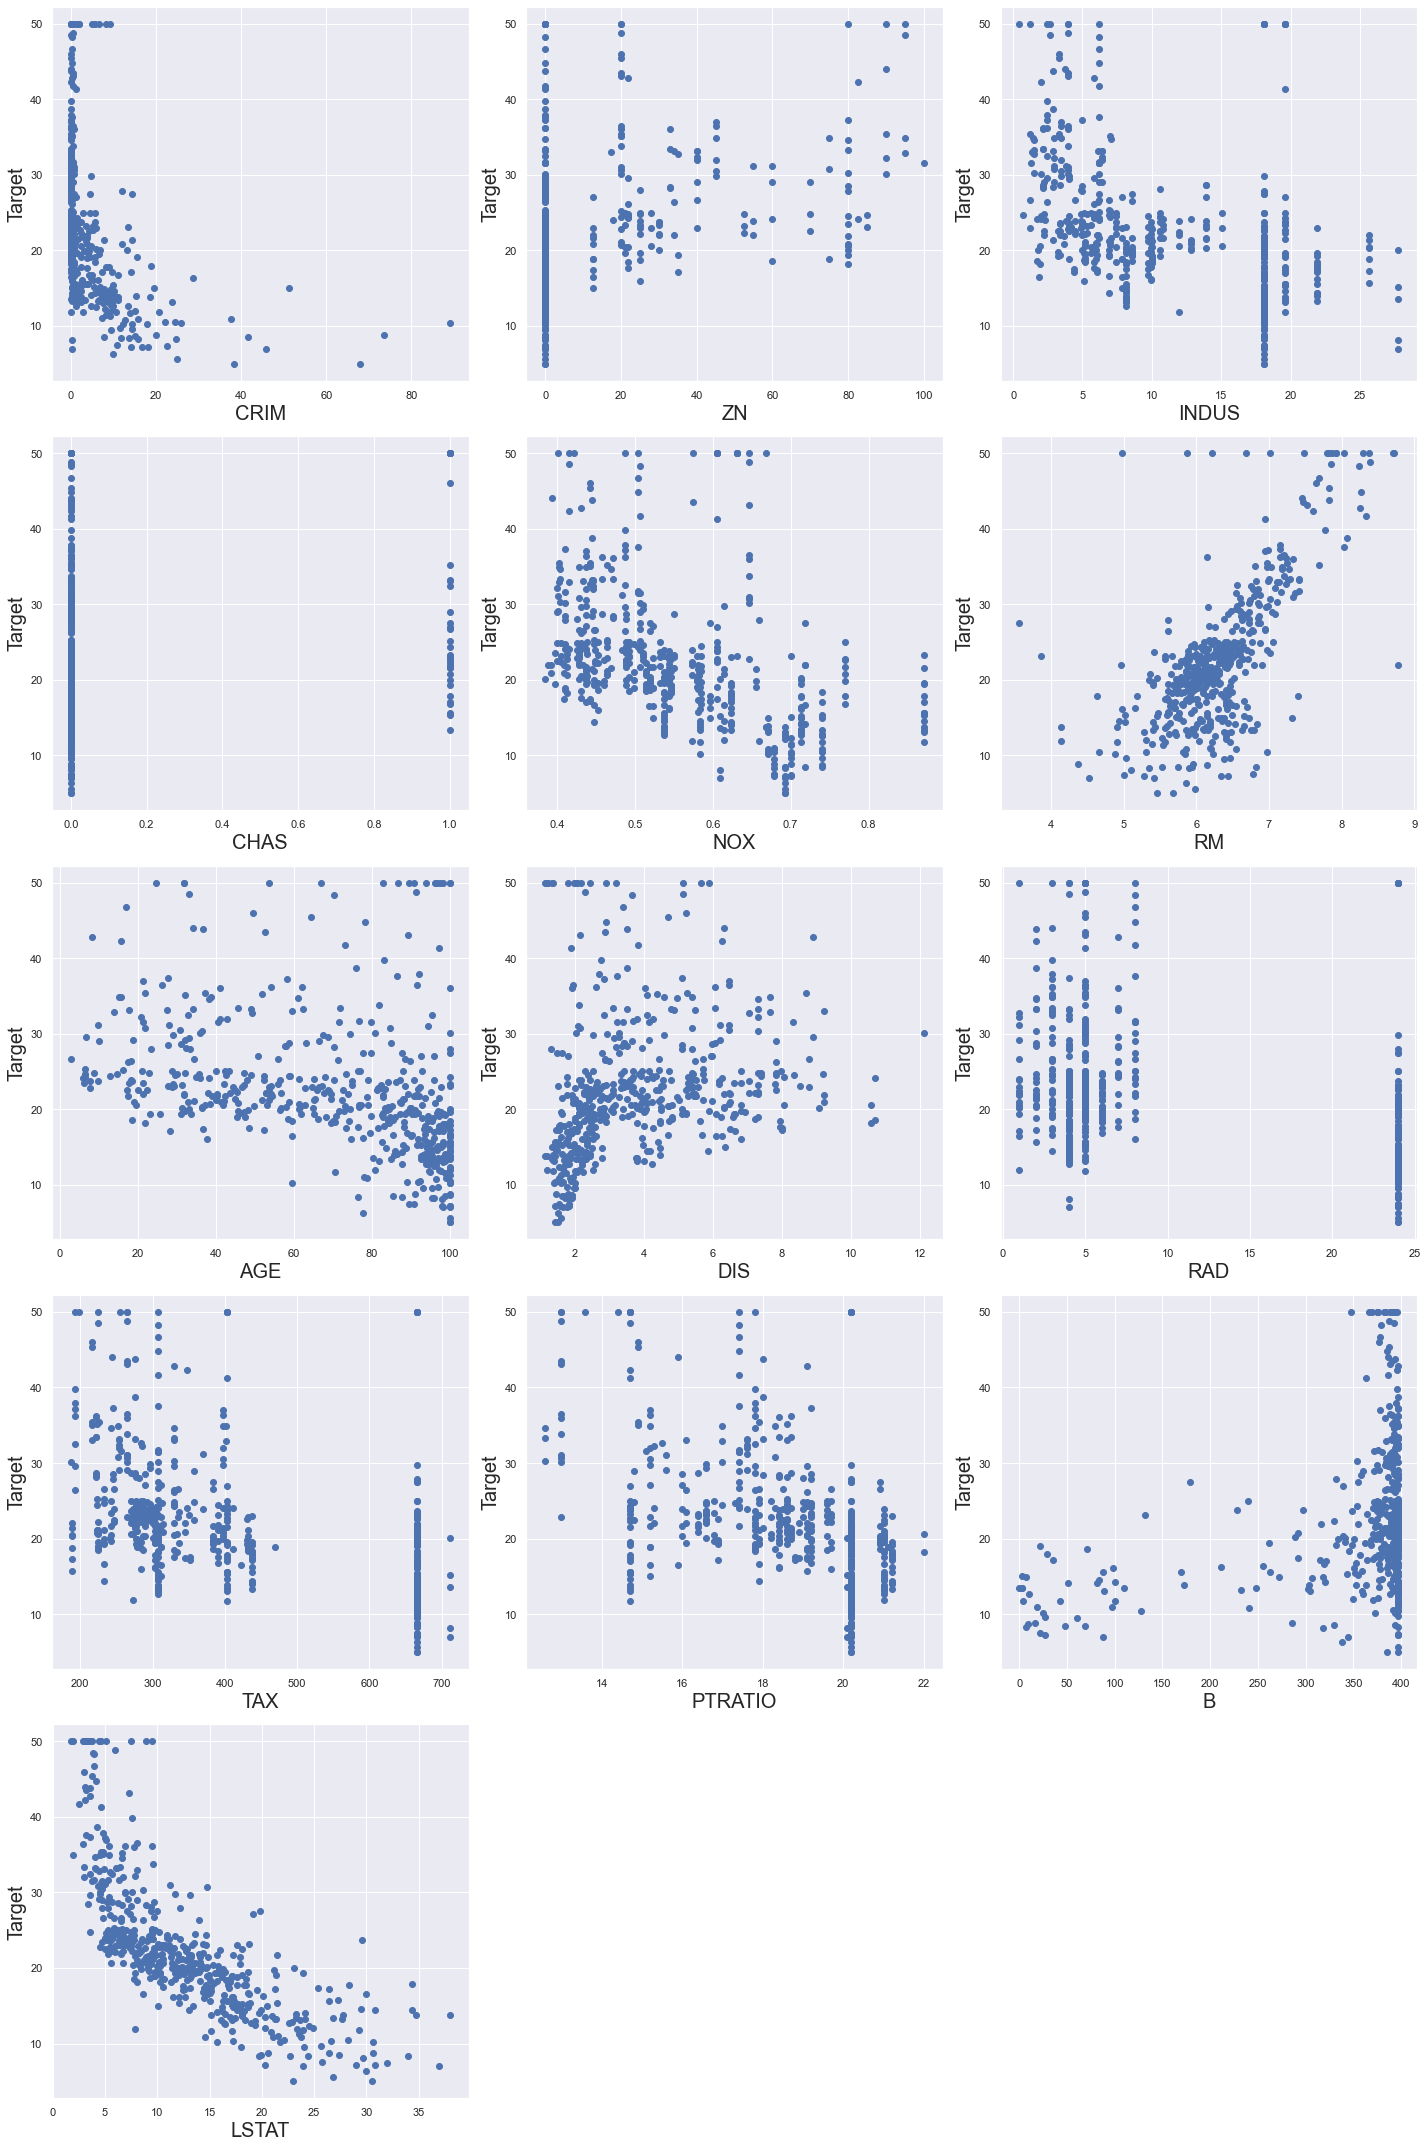

In [57]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Target',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [58]:
x=data.drop('Target',axis=1)
y=data['Target']
print("shape of x=",x.shape)
print("shape of y=",y.shape)

shape of x= (506, 13)
shape of y= (506,)


In [59]:
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

In [60]:
variables = x_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Target"] = x.columns

In [61]:
vif.sort_values(by ="VIF", ascending = False)

,VIF,Target
8,9.983959,RAD
9,8.673564,TAX
0,5.495018,CRIM
4,4.441175,NOX
7,4.126132,DIS
2,4.018978,INDUS
12,3.139482,LSTAT
6,3.102359,AGE
1,2.425607,ZN
10,1.884846,PTRATIO


In [62]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=355)

### Linear Regression

In [63]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [64]:
y_pred = regression.predict(x_test)

In [65]:
df=pd.DataFrame(data = [y_pred, y_test])
df.T

,0,1
0,12.151985,15.2
1,18.648591,18.0
2,30.775657,30.5
3,24.441625,23.4
4,4.795683,10.2
...,...,...
122,21.581806,50.0
123,13.073457,13.8
124,33.792023,34.6
125,12.412426,5.0


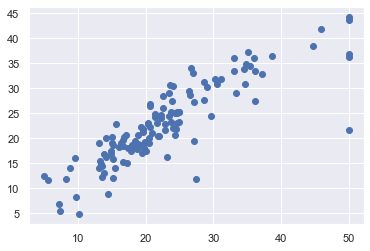

In [66]:
plt.scatter(y_test,y_pred)

In [67]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [68]:
regression.score(x_train,y_train)

0.7246651120840688

In [69]:
regression.score(x_test,y_test)

0.7485543197778914

In [70]:
r_square=r2_score(y_test, y_pred)
r_square

0.7485543197778914

In [71]:
adj_r2(x_train,y_train)

0.7148586640213096

In [72]:
adj_r2(x_test,y_test)

0.7196269406372948

In [73]:
regression.coef_

array([-0.64752295,  0.59408762, -0.18040198,  0.9956228 , -2.00751568,
        2.99396421, -0.30017154, -2.84729994,  1.86651203, -1.34155018,
       -1.95938219,  0.18158143, -3.43870515])

In [74]:
# Lasso Regularization
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [75]:
alpha = lasscv.alpha_
alpha

0.0007392307055626039

In [76]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0007392307055626039)

In [77]:
lasso_reg.score(x_test, y_test)

0.748463963013787

In [82]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([1.28791124, 2.56655006, 4.62193543, 5.70580111, 4.70223258,
       8.36280013, 1.16072932, 8.54370634, 8.82476359, 4.68695481,
       2.49967529, 8.23354801, 2.03281506, 0.63711049, 8.84563943,
       7.23341917, 7.91187366, 8.32345572, 4.930426  , 3.95885181,
       2.16236081, 6.310351  , 5.44108223, 0.57016983, 0.05452277,
       3.26843374, 8.52708854, 0.91814815, 5.39315347, 4.69301866,
       4.26470003, 9.06367681, 8.11909329, 5.91096689, 3.80980715,
       1.20551504, 8.65136489, 4.20036004, 7.3799676 , 5.41263268,
       6.04889203, 3.47922779, 0.9277496 , 8.53911924, 4.25611553,
       9.28308743, 6.35514443, 4.63326252, 5.24639454, 0.5042025 ]),
        cv=10, normalize=True)

In [83]:
ridgecv.alpha_

0.054522765545338414

In [84]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.054522765545338414)

In [85]:
ridge_model.score(x_test, y_test)

0.7485098219764976

### Random Foresr

In [86]:
Random_forest = RandomForestRegressor( n_estimators=10)
Random_forest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [87]:
Random_forest.score(x_test,y_test)

0.8197727520674536

In [88]:
y_prediction = Random_forest.predict(x_test)
y_prediction

array([15.13, 17.05, 31.04, 20.02,  7.66, 20.39, 21.14, 17.59, 44.11,
       14.31, 21.48, 20.41, 22.42, 18.96, 10.73, 32.7 , 19.6 , 19.58,
       23.9 , 13.29, 19.78, 23.96, 33.27, 22.62, 32.  , 23.25, 30.17,
       35.09, 29.6 , 20.87, 20.76, 23.5 , 13.93, 20.1 , 15.18, 24.45,
       44.75, 18.79, 26.26, 25.34, 19.41, 16.12, 19.18, 14.52, 20.8 ,
       19.3 , 24.89, 15.48, 25.5 , 17.31, 20.7 , 19.54, 17.66, 34.39,
       47.14,  7.75, 44.06, 26.29, 15.17, 22.38, 19.79, 22.08,  9.15,
       21.26, 24.96, 10.45, 23.12, 33.36, 19.55, 19.85, 15.92, 20.4 ,
       29.37, 16.99, 19.75, 45.6 , 13.51, 14.47, 20.17, 16.38,  8.33,
       18.48, 29.92, 20.43, 19.16, 35.7 , 14.72, 18.02, 14.37, 29.96,
       22.02, 20.8 , 34.38, 27.36, 14.83, 23.77, 21.  , 18.75, 35.38,
       24.09, 14.25, 31.98, 14.49, 22.2 , 24.07, 14.33, 35.47, 16.42,
       20.28, 20.29, 23.78, 48.1 , 20.66, 26.78, 42.73, 44.38, 12.54,
       32.86, 21.11, 21.28, 19.88,  9.51, 34.15, 16.7 , 33.04, 10.33,
       35.27])

In [89]:
rand=pd.DataFrame(data = [y_prediction, y_test])
#rand.T

In [90]:
Random_forest.score(x_train,y_train)

0.9692369134076089

### Randomized Search Cv

In [91]:
n_estimators = [int(x) for x in np.linspace(start = 120, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [1,2,4,5,7,9,10,14]
min_samples_leaf = [1, 2, 3,4,6,8,9]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse','mae']}
print(random_grid)

{'n_estimators': [120, 328, 537, 746, 955, 1164, 1373, 1582, 1791, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 4, 5, 7, 9, 10, 14], 'min_samples_leaf': [1, 2, 3, 4, 6, 8, 9], 'criterion': ['mse', 'mae']}


In [92]:
Randr=RandomForestRegressor(n_estimators=10)
rf_randomcv=RandomizedSearchCV(estimator=Randr,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomcv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 6, 8,
                                                             9],
                                        'min_samples_split': [1, 2, 4, 5, 7, 9,
                                                              10, 14],
                                        'n_estimators': [120, 328, 537, 746,
                                                         955, 1164, 1373, 1582,
          

In [93]:
rf_randomcv.best_params_

{'n_estimators': 120,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 670,
 'criterion': 'mae'}

In [94]:
best_random_grid=rf_randomcv.best_estimator_

In [95]:
y_prd=best_random_grid.predict(x_test)

In [96]:
best_random_grid.score(x_train,y_train)

0.972859392260782

In [97]:
best_random_grid.score(x_test,y_test)

0.8566551492339086

### GridSearch CV

In [98]:
best_random_grid=rf_randomcv.best_estimator_
best_random_grid

RandomForestRegressor(criterion='mae', max_depth=670, min_samples_split=5,
                      n_estimators=120)

In [99]:
rf_randomcv.best_params_

{'n_estimators': 120,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 670,
 'criterion': 'mae'}

In [100]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['mae'], 'max_depth': [670], 'max_features': ['auto'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [-80, 20, 120, 220, 320]}


In [101]:
Randr1=RandomForestRegressor()
grid_search=GridSearchCV(estimator=Randr1,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  6.4min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mae'], 'max_depth': [670],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [-80, 20, 120, 220, 320]},
             verbose=2)

In [200]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 120,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 1791}

In [202]:
grid_search.score(x_train,y_train)

0.9705304279944209

In [203]:
grid_search.score(x_test,y_test)

0.8668558904598584

In [204]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=120, min_samples_split=7, n_estimators=1791)

In [205]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=120, min_samples_split=7, n_estimators=1791)

In [207]:
grid_search.score(x_train,y_train)

0.9705304279944209

In [206]:
grid_search.score(x_test,y_test)

0.8668558904598584

In [185]:
y_predecion=best_grid.predict(x_test)